In [81]:
import pandas as pd
import numpy as np
import random 
import numpy.random

In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [83]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GroupShuffleSplit
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [84]:
orginal_data=pd.read_csv("F:\\abc.csv")

In [85]:
mu_eTIV, sigma_eTIV=orginal_data['eTIV'].mean(),orginal_data['eTIV'].var()
mu_MMSE, sigma_MMSE=orginal_data['MMSE'].mean(),orginal_data['MMSE'].var()
mu_EDUC, sigma_EDUC=orginal_data['EDUC'].mean(),orginal_data['EDUC'].var()
age_range = (60, 100)

In [86]:
Visit =np.round(np.linspace(0, 4, num=5))
Visit

array([0., 1., 2., 3., 4.])

In [87]:
import numpy as np
import scipy.special

N = 100
m = 5

Y = eta = np.zeros((N, m))
Age = np.random.choice(range(age_range[0], age_range[1] + 1), size=N)
MMSE = np.round(np.random.normal(mu_MMSE, sigma_MMSE, size=N))
EDUC = np.round(np.random.normal(mu_EDUC, sigma_EDUC, size=N))
Sex = np.random.binomial(1, 0.2, size=N)
eTIV = np.round(np.random.normal(mu_eTIV, sigma_eTIV, size=N))
ASF = np.random.normal(size=N)
nWBV = np.random.normal(size=N)
Visit = np.round(np.linspace(0, 4, num=m))


B = np.array([0.1, -0.1, 0.2, -0.2, 0.3, 0.3, 0.1, 0.1, 0.2,.1])
b = np.random.normal(0, 0.5, size=N)


for i in range(N):
    for j in range(m):
        eta[i, j] = B[0] + B[1] * Visit[j] + B[2] * Age[i] + B[3] * MMSE[i] + B[4] * EDUC[i] + B[5] * Sex[i] + \
                    B[6] * eTIV[i] + B[7] * ASF[i] + B[8] * nWBV[i]+b[i]
        p = scipy.special.expit(eta[i, j])
        Y[i, j] = np.random.binomial(1, p)

np.random.seed(1)

mat = np.empty((N * m, 10))
p = 0
for i in range(N):
    jk = 0
    for jj in range(p, p + m):
        mat[jj, 0] = i + 1
        mat[jj, 1] = Visit[jk]
        mat[jj, 2] = Age[i]
        mat[jj, 3] = MMSE[i]
        mat[jj, 4] = EDUC[i]
        mat[jj, 5] = Sex[i]
        mat[jj, 6] = eTIV[jk]
        mat[jj, 7] = ASF[jk]
        mat[jj, 8] = nWBV[jk]
        mat[jj, 9] = Y[i, jk]  # Corrected assignment for 'Y' column
        jk += 1
    p += m

# Convert the `mat` array to a DataFrame
df_mat = pd.DataFrame(mat, columns=['ID', 'Visit', 'Age', 'MMSE', 'EDUC', 'Sex', 'eTIV', 'ASF', 'nWBV','Y'])


In [88]:
df_mat

,ID,Visit,Age,MMSE,EDUC,Sex,eTIV,ASF,nWBV,Y
0,1.0,0.0,97.0,22.0,21.0,0.0,31063.0,1.629187,0.256479,1.0
1,1.0,1.0,97.0,22.0,21.0,0.0,-11984.0,0.152737,-0.229188,1.0
2,1.0,2.0,97.0,22.0,21.0,0.0,40304.0,-1.058285,-2.081639,1.0
3,1.0,3.0,97.0,22.0,21.0,0.0,-7045.0,-0.101948,1.266967,1.0
4,1.0,4.0,97.0,22.0,21.0,0.0,-29389.0,0.047720,0.805104,1.0
...,...,...,...,...,...,...,...,...,...,...
495,100.0,0.0,73.0,9.0,13.0,0.0,31063.0,1.629187,0.256479,0.0
496,100.0,1.0,73.0,9.0,13.0,0.0,-11984.0,0.152737,-0.229188,0.0
497,100.0,2.0,73.0,9.0,13.0,0.0,40304.0,-1.058285,-2.081639,0.0
498,100.0,3.0,73.0,9.0,13.0,0.0,-7045.0,-0.101948,1.266967,0.0


In [89]:
df = pd.get_dummies(df_mat, columns = ["Visit"],prefix = "Visit")

In [90]:
df.head()

,ID,Age,MMSE,EDUC,Sex,eTIV,ASF,nWBV,Y,Visit_0.0,Visit_1.0,Visit_2.0,Visit_3.0,Visit_4.0
0,1.0,97.0,22.0,21.0,0.0,31063.0,1.629187,0.256479,1.0,1,0,0,0,0
1,1.0,97.0,22.0,21.0,0.0,-11984.0,0.152737,-0.229188,1.0,0,1,0,0,0
2,1.0,97.0,22.0,21.0,0.0,40304.0,-1.058285,-2.081639,1.0,0,0,1,0,0
3,1.0,97.0,22.0,21.0,0.0,-7045.0,-0.101948,1.266967,1.0,0,0,0,1,0
4,1.0,97.0,22.0,21.0,0.0,-29389.0,0.047720,0.805104,1.0,0,0,0,0,1


In [91]:
RANDOM_STATE=13

In [92]:
splitter = GroupShuffleSplit(test_size=.20, n_splits=1, random_state = RANDOM_STATE)


In [93]:
split = splitter.split(df, groups=df['ID'])
train_indexes, test_indexes = next(split)

X_train = df.iloc[train_indexes]
X_test = df.iloc[test_indexes]

In [94]:
age_scaler = MinMaxScaler()
educ_scaler = MinMaxScaler()
mmse_scaler = MinMaxScaler()
etiv_scaler = MinMaxScaler()

age_scaler.fit(X_train["Age"].to_numpy().reshape(-1,1))
educ_scaler.fit(X_train["EDUC"].to_numpy().reshape(-1,1))
mmse_scaler.fit(X_train["MMSE"].to_numpy().reshape(-1,1))
etiv_scaler.fit(X_train["eTIV"].to_numpy().reshape(-1,1))


X_train["Age"] = age_scaler.transform(X_train["Age"].to_numpy().reshape(-1,1))
X_train["EDUC"] = educ_scaler.transform(X_train["EDUC"].to_numpy().reshape(-1,1))
X_train["MMSE"] = mmse_scaler.transform(X_train["MMSE"].to_numpy().reshape(-1,1))
X_train["eTIV"] = etiv_scaler.transform(X_train["eTIV"].to_numpy().reshape(-1,1))


X_test["Age"] = age_scaler.transform(X_test["Age"].to_numpy().reshape(-1,1))
X_test["EDUC"] = educ_scaler.transform(X_test["EDUC"].to_numpy().reshape(-1,1))
X_test["MMSE"] = mmse_scaler.transform(X_test["MMSE"].to_numpy().reshape(-1,1))
X_test["eTIV"] = mmse_scaler.transform(X_test["eTIV"].to_numpy().reshape(-1,1))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9400\3039093455.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["Age"] = age_scaler.transform(X_train["Age"].to_numpy().reshape(-1,1))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9400\3039093455.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train["EDUC"] = educ_scaler.transform(X_train["EDUC"].to_numpy().reshape(-1,1))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9400\3039093455.py:14: SettingWithCopyWarning: 
A value is trying to be set on

In [95]:
visit_3 = df[df["Visit_4.0"] == 1][["ID","Y"]]


In [96]:
y_train_final = []
for id in X_train["ID"].unique():
    res = visit_3[visit_3["ID"] == id]["Y"].values[0]
    y_train_final.append(res)

y_test_final = []
for id in X_test["ID"].unique():
    res = visit_3[visit_3["ID"] == id]["Y"].values[0]
    y_test_final.append(res)

In [97]:
y_train_super_final = pd.DataFrame({
    "Group": y_train_final
})

y_test_super_final = pd.DataFrame({
    "Group": y_test_final
})

In [98]:
X_test_final = X_test.drop(["ID"], axis = 1)
X_train_final = X_train.drop(["ID"], axis = 1)

In [99]:
y=df_mat['Y']
x=df_mat.drop(['Y'],axis=1)

In [100]:
X_train_final

,Age,MMSE,EDUC,Sex,eTIV,ASF,nWBV,Y,Visit_0.0,Visit_1.0,Visit_2.0,Visit_3.0,Visit_4.0
0,0.925,0.380952,0.631579,0.0,0.867404,1.629187,0.256479,1.0,1,0,0,0,0
1,0.925,0.380952,0.631579,0.0,0.249738,0.152737,-0.229188,1.0,0,1,0,0,0
2,0.925,0.380952,0.631579,0.0,1.000000,-1.058285,-2.081639,1.0,0,0,1,0,0
3,0.925,0.380952,0.631579,0.0,0.320606,-0.101948,1.266967,1.0,0,0,0,1,0
4,0.925,0.380952,0.631579,0.0,0.000000,0.047720,0.805104,1.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.325,0.174603,0.421053,0.0,0.867404,1.629187,0.256479,0.0,1,0,0,0,0
496,0.325,0.174603,0.421053,0.0,0.249738,0.152737,-0.229188,0.0,0,1,0,0,0
497,0.325,0.174603,0.421053,0.0,1.000000,-1.058285,-2.081639,0.0,0,0,1,0,0
498,0.325,0.174603,0.421053,0.0,0.320606,-0.101948,1.266967,0.0,0,0,0,1,0


In [101]:
rows_n = 5
X_train_super_final = np.reshape(X_train_final.to_numpy(),(X_train_final.shape[0]//5,X_train_final.shape[1],rows_n))
X_test_super_final = np.reshape(X_test_final.to_numpy(),(X_test_final.shape[0]//5,X_train_final.shape[1],rows_n))

In [102]:
X_train_super_final.shape


(80, 13, 5)

In [103]:
def build_lstm_rnn():
    lstm_rnn = tf.keras.Sequential()
    lstm_rnn.add(tf.keras.layers.LSTM(100, return_sequences = True,input_shape = (X_train_super_final.shape[1],X_train_super_final.shape[2]) ) )
    lstm_rnn.add(tf.keras.layers.LSTM(50,return_sequences = False))
    lstm_rnn.add(tf.keras.layers.Dense(1,activation = "sigmoid"))
    lstm_rnn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    return lstm_rnn

In [104]:
lstm_rnn = build_lstm_rnn()
lstm_rnn.fit(X_train_super_final, y_train_super_final, epochs = 100)
not_final_lstm_rnn_prediction = lstm_rnn.predict(X_test_super_final)
lstm_rnn_prediction = np.where(not_final_lstm_rnn_prediction > 0.5, 1, 0)
print(classification_report(y_test_super_final,lstm_rnn_prediction, target_names= ["Non-Demanted", "Demanted"]))


Epoch 1/100
3/3 [==============================] - 7s 24ms/step - loss: 0.6886 - accuracy: 0.6500
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 0.6745 - accuracy: 0.5875
Epoch 3/100
3/3 [==============================] - 0s 22ms/step - loss: 0.6645 - accuracy: 0.5875
Epoch 4/100
3/3 [==============================] - 0s 24ms/step - loss: 0.6535 - accuracy: 0.5875
Epoch 5/100
3/3 [==============================] - 0s 24ms/step - loss: 0.6338 - accuracy: 0.5875
Epoch 6/100
3/3 [==============================] - 0s 23ms/step - loss: 0.5965 - accuracy: 0.7000
Epoch 7/100
3/3 [==============================] - 0s 25ms/step - loss: 0.5367 - accuracy: 0.9000
Epoch 8/100
3/3 [==============================] - 0s 25ms/step - loss: 0.4397 - accuracy: 0.9250
Epoch 9/100
3/3 [==============================] - 0s 25ms/step - loss: 0.3066 - accuracy: 0.9375
Epoch 10/100
3/3 [==============================] - 0s 26ms/step - loss: 0.1737 - accuracy: 0.9625
Epoch 11/100
3/3 [=

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

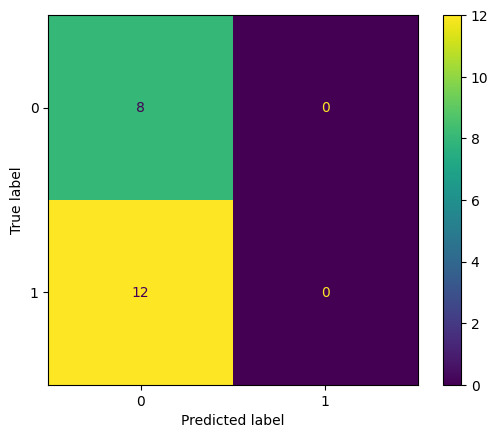

In [105]:
lstm_rnn_conf = confusion_matrix(y_test_super_final,lstm_rnn_prediction)
lstm_rnn_plot_conf = ConfusionMatrixDisplay(lstm_rnn_conf)
lstm_rnn_plot_conf.plot()

In [106]:
TP=lstm_rnn_conf[1,1]
FP=lstm_rnn_conf[0,1]
TN=lstm_rnn_conf[0,0]
FN=lstm_rnn_conf[1,0]
accuracy1=(TP+TN)/(TP+FP+FN+TN)
recall1=TP/(TP+FN)
percision1=TP/(TP+TN)
print(round(accuracy1,2),round(recall1,2),round(percision1,2))

0.4 0.0 0.0


In [107]:
def build_gru_rnn():
    gru_rnn = tf.keras.Sequential()
    gru_rnn.add(tf.keras.layers.GRU(100, return_sequences = True,input_shape = (X_train_super_final.shape[1],X_train_super_final.shape[2])) )
    gru_rnn.add(tf.keras.layers.GRU(50,return_sequences = False))
    gru_rnn.add(tf.keras.layers.Dense(1,activation = "sigmoid"))
    gru_rnn.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    return gru_rnn

Epoch 1/100
3/3 [==============================] - 5s 20ms/step - loss: 0.6906 - accuracy: 0.5875
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6656 - accuracy: 0.5875
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 0.6442 - accuracy: 0.6000
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 0.6186 - accuracy: 0.6500
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 0.5904 - accuracy: 0.6500
Epoch 6/100
3/3 [==============================] - 0s 18ms/step - loss: 0.5535 - accuracy: 0.7500
Epoch 7/100
3/3 [==============================] - 0s 20ms/step - loss: 0.5072 - accuracy: 0.9875
Epoch 8/100
3/3 [==============================] - 0s 19ms/step - loss: 0.4470 - accuracy: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 18ms/step - loss: 0.3728 - accuracy: 0.9750
Epoch 10/100
3/3 [==============================] - 0s 18ms/step - loss: 0.2863 - accuracy: 0.9750
Epoch 11/100
3/3 [=

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

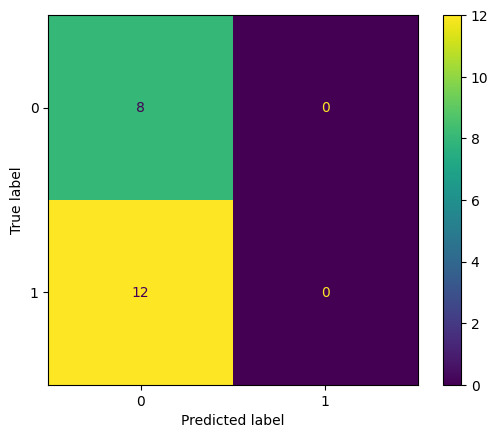

In [108]:
gru_rnn = build_gru_rnn()
gru_rnn.fit(X_train_super_final, y_train_super_final, epochs = 100)
not_final_gru_rnn_prediction = gru_rnn.predict(X_test_super_final)
gru_rnn_prediction = np.where(not_final_gru_rnn_prediction > 0.5, 1, 0)
print(classification_report(y_test_super_final,gru_rnn_prediction, target_names= ["Non-Demanted", "Demanted"]))
gru_rnn_conf = confusion_matrix(y_test_super_final,gru_rnn_prediction)
gru_rnn_plot_conf = ConfusionMatrixDisplay(gru_rnn_conf)
gru_rnn_plot_conf.plot()

In [109]:
TP=gru_rnn_conf[1,1]
FP=gru_rnn_conf[0,1]
TN=gru_rnn_conf[0,0]
FN=gru_rnn_conf[1,0]
accuracy2=(TP+TN)/(TP+FP+FN+TN)
recall2=TP/(TP+FN)
percision2=TP/(TP+TN)
print(round(accuracy2,2),round(recall2,2),round(percision2,2))

0.4 0.0 0.0
